<h1> todo : </h1>
<h3>
    <ol>
        <li> figure out how to slice the model and get embedddings : 
            <ul>
                <li> lead : use model.resnet it contains all the layers except the final flatten layer and the 1000-node classification head </li>
            </ul>
        </li>
    </ol>    
</h3>

<h1> SETUP </h1>

In [15]:
import torch
import os
import cv2
import supervision as sv
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import cv2

from groundingdino.util.inference import Model

import sys

def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

from utils.model_utils import check_model_paths , get_sam_model , get_gdino_model, enhance_class_name, segment
from utils.model_utils import plot_detections, get_resnet_model
from utils.data_utils import normalize
from utils.viz_utils import viz_im_small, concise_ims_and_plots, get_bar_plot

from utils.viz_utils import viz_im_small

check_model_paths()


cuda
../bin/model_files/groundingdino_swint_ogc.pth  exists
../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py  exists
../bin/model_files/sam_vit_h_4b8939.pth  exists


<h1> inference </h1>

In [18]:
gdino_model = get_gdino_model()
sam_model = get_sam_model("vit_h")
resnet_model = get_resnet_model()

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


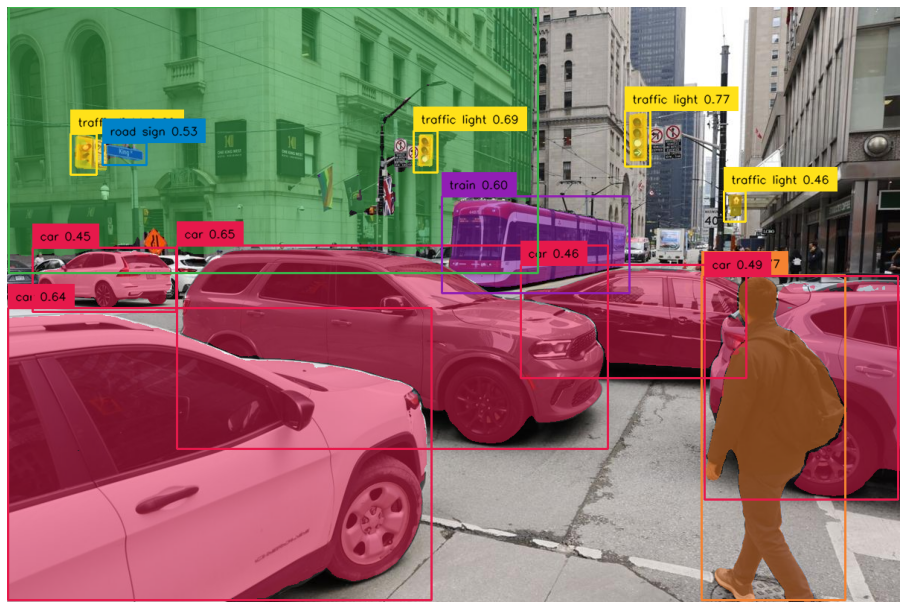

In [23]:
# SOURCE_IMAGE_PATH = "../data/images/road_traffic_1.jpg"
# CLASSES = ['car', 'building', 'traffic light', 'road sign', 'person', 'train']
# BOX_TRESHOLD = 0.40
# TEXT_TRESHOLD = 0.25

# image = cv2.imread(SOURCE_IMAGE_PATH)

# print(f"image shape : {image.shape}")
# # detect objects
# detections = gdino_model.predict_with_classes(
#     image=image,
#     classes=enhance_class_name(class_names=CLASSES),
#     box_threshold=BOX_TRESHOLD,
#     text_threshold=TEXT_TRESHOLD
# )

# # convert detections to masks
# detections.mask = segment(
#     sam_predictor=sam_model,
#     image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
#     xyxy=detections.xyxy
# )


plot_detections(image,
                detections,
                CLASSES)

In [49]:

keep_inds = nms(boxes, scores, 0.19)
print(keep_inds)

tensor([ 0,  1,  2,  4,  5,  6,  7,  9, 10, 11, 12])


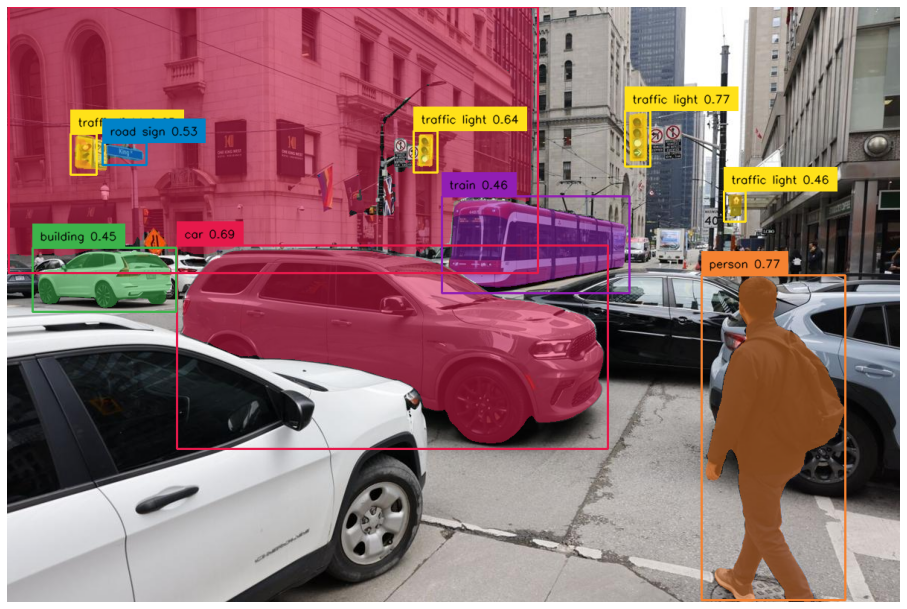

: 

In [51]:
from torchvision.ops import nms

boxes = torch.tensor(detections.xyxy)
scores = torch.tensor(detections.confidence)

keep_inds = nms(boxes, scores, 0.09)

detections2 = detections
detections2.xyxy = detections.xyxy[keep_inds]
detections2.mask = detections.mask[keep_inds]
detections2.confidence = detections.confidence[keep_inds]
detections2.class_id = detections.class_id[keep_inds]


plot_detections(image,
                detections,
                CLASSES)


plot_detections(image,
                detections2,
                CLASSES)

detections.masks

In [22]:
detections

Detections(xyxy=array([[ 933.3179   ,  361.1009   , 1126.8423   ,  797.8852   ],
       [ 830.04364  ,  140.86813  ,  864.2703   ,  215.10864  ],
       [ 228.9159   ,  321.28253  ,  807.4169   ,  594.1085   ],
       [   1.8871155,  405.9466   ,  570.4523   ,  797.69415  ],
       [  85.36475  ,  171.01842  ,  120.692375 ,  226.86351  ],
       [ 546.37146  ,  167.71863  ,  578.3981   ,  223.469    ],
       [ 690.7694   ,  347.37732  ,  993.89685  ,  499.2044   ],
       [ 128.07106  ,  183.9009   ,  187.2614   ,  213.79097  ],
       [  34.260254 ,  324.95923  ,  227.86911  ,  410.37402  ],
       [ 584.7454   ,  255.75055  ,  836.0384   ,  385.1275   ],
       [ 963.90936  ,  248.667    ,  992.759    ,  289.27606  ],
       [   2.2597961,    1.8012543,  713.10364  ,  358.7932   ],
       [ 937.0554   ,  362.88696  , 1197.2556   ,  662.8712   ]],
      dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False

<h1> RESNET EMBEDDINGS </h1>

In [ ]:

from utils.model_utils import check_model_paths , get_sam_model , get_gdino_model, enhance_class_name, segment
from utils.model_utils import plot_detections, get_resnet_model
from utils.data_utils import normalize
from utils.viz_utils import viz_im_small, concise_ims_and_plots, get_bar_plot
from utils.distance_utils import get_k_nearest

In [ ]:
from IPython.display import Image as im 
from IPython.display import display as dis 
import glob 
import torch
import cv2
import matplotlib.pyplot as plt



testim_paths = glob.glob("../data/images/embedding_tester/*")

embedding_dict = dict()
input_dict = dict()

plotter = concise_ims_and_plots(xdim = 15, ydim = 15)


with torch.no_grad():
    global_object_id = 0
    for ind, i in enumerate(testim_paths):
        predicted_label = resnet_model.predict(cv2.imread(i), return_embedding = False)
        print(f"\nPREDICTED CLASS : {predicted_label}\n")

        embedding = resnet_model.predict(cv2.imread(i), return_embedding = True)
        print(f"final embedding shape : {embedding.shape}")

        object_id = f"{predicted_label}_" + str(global_object_id)
        object_id = f"{predicted_label}_" + str(global_object_id)

        embedding_dict[object_id] = embedding.detach().cpu().numpy()
        input_dict[object_id] = cv2.imread(i)
        
        plotter.add_plot_data(cv2.imread(i), '')
        
        norm = np.linalg.norm(embedding)
        viz_embedding = embedding / norm
        # viz_embedding = normalize(embedding) 
        plotter.add_plot_data(get_bar_plot(viz_embedding), f'embedding : {predicted_label}')

        global_object_id+=1

plotter.viz_plot_data("emebddings visualization", mode = 'square')

In [ ]:

embedding_names = np.array(list(embedding_dict.keys()))
embedding_matrix = np.array(list(embedding_dict.values()))
input_masked_crops  = np.array(list(input_dict.values()))

norms = np.linalg.norm(embedding_matrix, axis=1, keepdims=True)

norms

In [ ]:


def get_k_nearest(embedding_matrix, image_array, class_names, k):
    # embedding_names = np.array(list(embedding_dict.keys()))
    # embedding_matrix = np.array(list(embedding_dict.values()))
    # input_masked_crops  = np.array(list(input_dict.values()))

    norms = np.linalg.norm(embedding_matrix, axis=1, keepdims=True)
    print(norms)
    normalized_embeddings = embedding_matrix / norms

    cosine_similarity_matrix = np.dot(normalized_embeddings, normalized_embeddings.T)
    
    cosine_similarity_matrix -= np.eye(embedding_matrix.shape[0]) * cosine_similarity_matrix.max()

    neighbour_inds = (cosine_similarity_matrix).argsort(axis =  1)[:, -k:]

    return class_names[neighbour_inds], image_array[neighbour_inds]

In [ ]:

embedding_names = np.array(list(embedding_dict.keys()))
embedding_matrix = np.array(list(embedding_dict.values()))
input_masked_crops  = np.array(list(input_dict.values()))

nn_embeddings, nn_masks = get_k_nearest(embedding_dict, input_dict, k)

plotter = concise_ims_and_plots()

for ind, (label, masked_crop) in enumerate(input_dict.items()):

    plotter.add_plot_data(masked_crop, f"TARGET : {label}")

    for j in range(k):     
        tempim = cv2.resize(nn_masks[ind, j].astype(float), (100,100))

        plotter.add_plot_data(normalize(nn_masks[ind, j].astype(float)), f"match : {3-j}")
        
plotter.viz_plot_data("KNN MATCHING")

<h1> Resnet prediction on Masks </h1>

['/app/data/images/embedding_tester/aeroplane.jpg', '/app/data/images/embedding_tester/aeroplane_2.jpg', '/app/data/images/embedding_tester/aeroplane_3.jpg', '/app/data/images/embedding_tester/apple_1.jpeg', '/app/data/images/embedding_tester/apple_2.jpg', '/app/data/images/embedding_tester/apple_3.jpg', '/app/data/images/embedding_tester/dog_1.jpg', '/app/data/images/embedding_tester/dog_2.jpg', '/app/data/images/embedding_tester/dog_3.jpg']

classes : ['apple', 'aeroplane', 'dog']



/opt/conda/lib/python3.7/site-packages/transformers/modeling_utils.py:885: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning
/opt/conda/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


results : 
 apple : 1


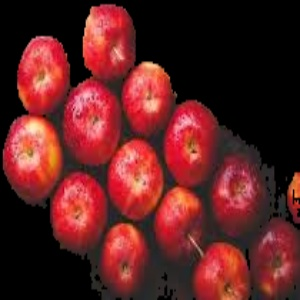

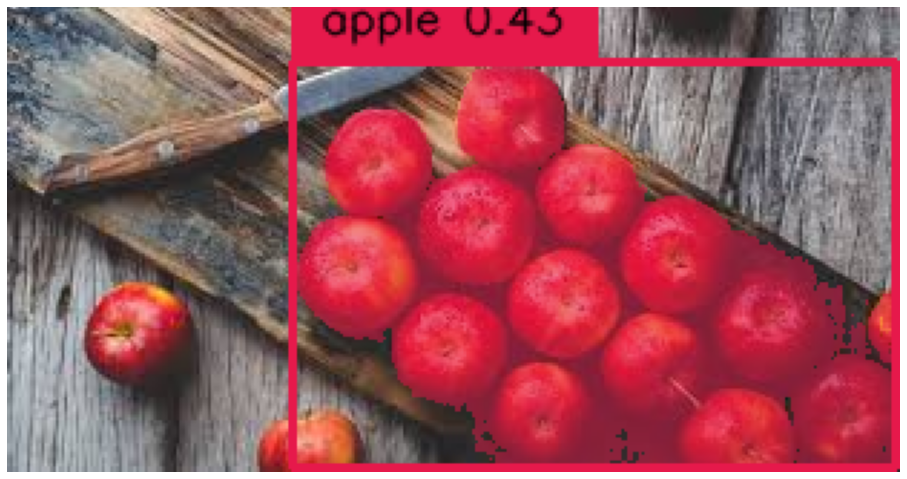

results : 
 apple : 10


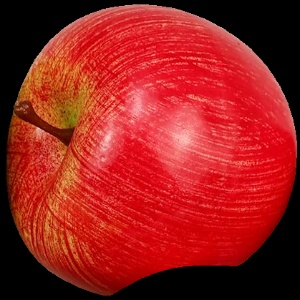

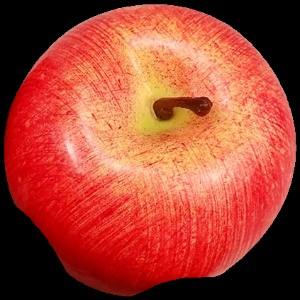

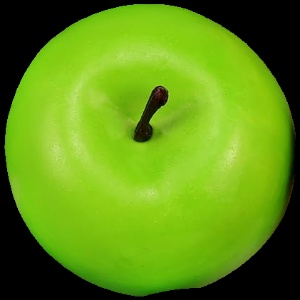

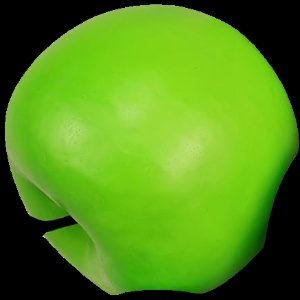

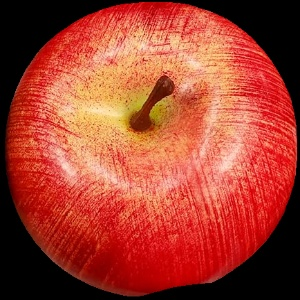

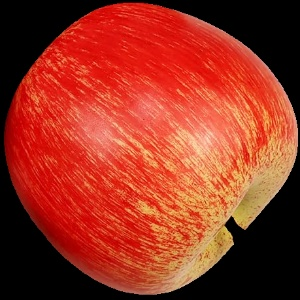

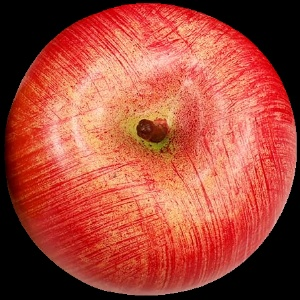

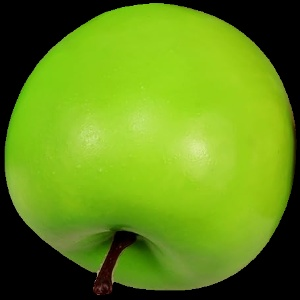

In [3]:
import os
from utils.model_utils import object_embedder

test_class = object_embedder(segmentor = sam_model,
                             detector = gdino_model,
                             embeddor = resnet_model)

dir_path = "/app/data/images/embedding_tester/"
image_paths = [os.path.join(dir_path, im_path) for im_path in os.listdir(dir_path)]
print(image_paths)
classes = ["apple", "aeroplane", "dog"]

test_class.detect_objects(image_paths[3:-3], classes, viz_outputs = True)
# test_class.detect_objects(["/app/data/images/road_traffic_1.jpg"], classes, viz_outputs = True)


In [ ]:
from IPython.display import Image as im 
from IPython.display import display as dis 

print(f"image shape : {image.shape}")
print(f"detections type : {type(detections.mask)}")
print(f"detections shape : {detections.mask.shape}")
masks = detections.mask
masks = masks.astype(int)

embedding_dict = dict()
input_dict = dict()

plotter = concise_ims_and_plots(15,15)

with torch.no_grad():
    global_object_id = 0
    for i in range(len(masks)):

        masked_image = image * np.concatenate([masks[i][..., None],
                    masks[i][..., None],
                    masks[i][..., None]], axis = 2)
    
        ymin, xmin, ymax, xmax = detections.xyxy[i].astype(int)
        masked_image = masked_image[xmin:xmax, ymin:ymax, :]

        predicted_label = resnet_model.predict(masked_image, return_embedding = False)
        
        plotter.add_plot_data(masked_image, "")
            
        embedding = resnet_model.predict(masked_image, return_embedding = True)
        
        norm = np.linalg.norm(embedding.detach().cpu().numpy())
        viz_embedding = embedding / norm
        plotter.add_plot_data(get_bar_plot(viz_embedding.detach().cpu().numpy()), f'embedding : {predicted_label}')

        object_id = f"{predicted_label}_" + str(global_object_id)
        embedding_dict[object_id] = embedding.detach().cpu().numpy()
        input_dict[object_id] = masked_image

plotter.viz_plot_data()

In [5]:
from utils.data_utils import get_string_hash

get_string_hash(" ".join(test_class.source_paths))

'abd28aeb059756e9bcf294c286d37a30'

In [7]:
import os
os.listdir("/app/bin/results/")

['embedding_details_765f00b2c2195ce2b9925973bbcb259f.pkl',
 'embedding_details_abd28aeb059756e9bcf294c286d37a30.pkl',
 'embedding_matrix_765f00b2c2195ce2b9925973bbcb259f.pkl',
 'embedding_matrix_abd28aeb059756e9bcf294c286d37a30.pkl']

In [10]:
from utils.data_utils import load_object_from_file
results_path = "/app/bin/results/"
embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_765f00b2c2195ce2b9925973bbcb259f.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_765f00b2c2195ce2b9925973bbcb259f.pkl"))

In [13]:
from utils.distance_utils import get_k_nearest

In [14]:
get_k_nearest

<function utils.distance_utils.get_k_nearest(embedding_dict, input_dict, k)>

In [ ]:

k = 3
nn_embeddings, nn_masks = get_k_nearest(embedd, input_dict, k)



    
# for ind, (label, masked_crop) in enumerate(input_dict.items()):
#     print(f"\ncurrent image : {label}\n")
    
#     print(f"masked crop type : {type(masked_crop)}, masked_crop shape : {masked_crop.shape}")
#     cv2.imwrite("temp.jpg", masked_crop)
#     dis(im("temp.jpg"))

#     print(f"neigbours of : {label}")
#     print(nn_embeddings[ind])
#     # for j in range(k):     
#     #     tempim = cv2.resize(nn_masks[ind, j].astype(float), (100,100))
#     #     cv2.imwrite("temp.jpg", tempim)
#     #     dis(im("temp.jpg"))



    


In [ ]:
with torch.no_grad():
    i = 2
    masked_image = image * np.concatenate([masks[i][..., None],
                    masks[i][..., None],
                    masks[i][..., None]], axis = 2)

    ymin, xmin, ymax, xmax = detections.xyxy[i].astype(int)
    print(f"xmin : {xmin}, ymin : {ymin}, xmax : {xmax}, ymax {ymax}")
    print(f"masked image crop shape ; {masked_image[xmin:xmax, ymin:ymax, :].shape}")
    masked_image = masked_image[xmin:xmax, ymin:ymax, :]
    cv2.imwrite("temp.jpg", masked_image)
    dis(im("temp.jpg"))

    #   RESNET PREDICTION 
    inputs = processor(masked_image, return_tensors="pt")
    logits = model(**inputs).logits
    predicted_label = logits.argmax(-1).item()
    print(f"\nPREDICTED CLASS : {model.config.id2label[predicted_label]}\n")

    #   RESNET EMBEDDINGS
    embedding = model.resnet(**inputs)[1]
    embedding = model.classifier[0](embedding)
    print(f"final embedding shape : {embedding.shape}")